In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [3]:
data = pd.read_csv('../data/where/UAE.csv')
data

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193


Proviamo a vedere la differenza tra l'incidenza dei tumori sulle persone di nazionalità emirata dei tumori rispetto a chi viene da un'altra parte e anche tra maschi e femmine degli emirati.

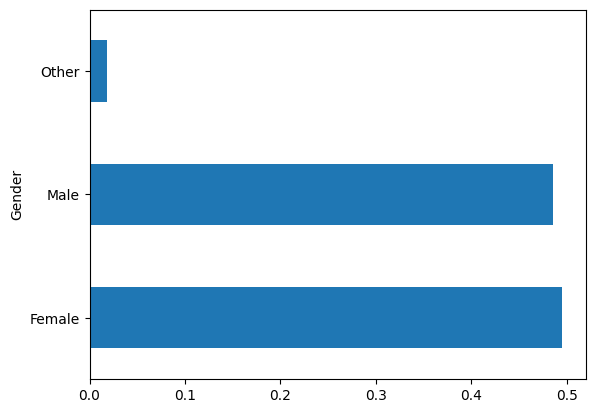

In [4]:
nativi = data[data['Nationality'] == 'Emirati']
gender = nativi['Gender'].value_counts(normalize=True).plot(kind='barh')
plt.show()

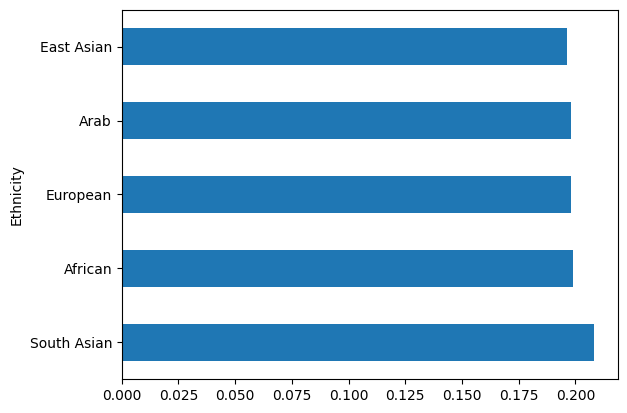

In [5]:
etnie = data['Ethnicity'].value_counts(normalize=True).plot(kind='barh')
plt.show()

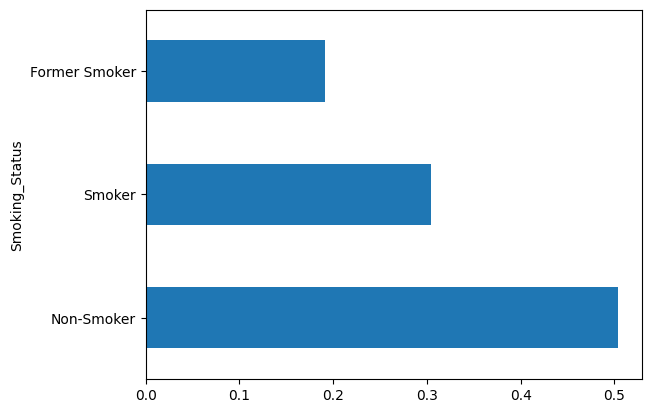

In [6]:
data['Smoking_Status'].value_counts(normalize=True).plot(kind='barh')
plt.show()

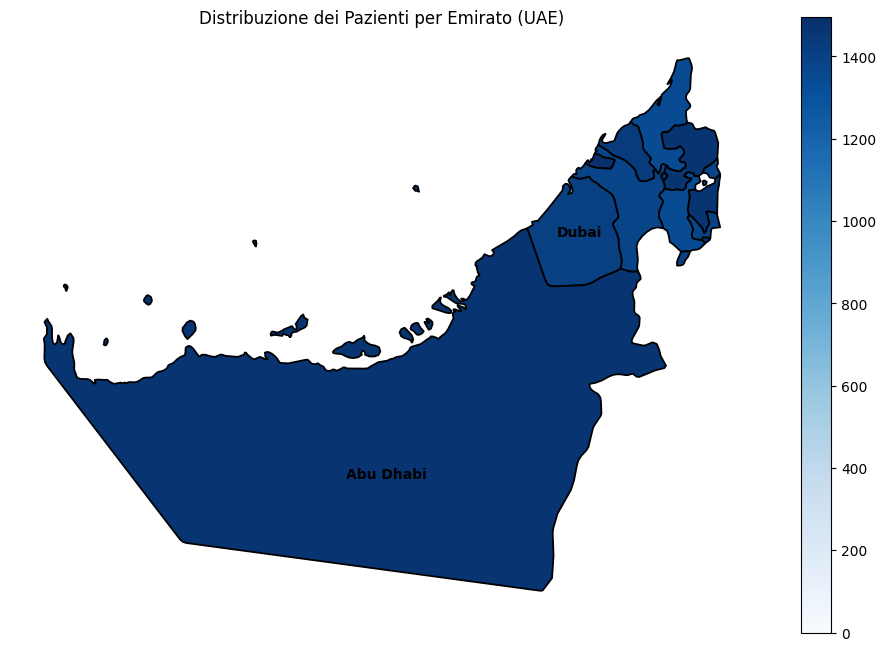

In [7]:
freq = data["Emirate"].value_counts().reset_index()
freq.columns = ["Emirate", "Count"]

uae_map = gpd.read_file("../maps/ae.json")

rename_map = {
    "Dubay": "Dubai",
    "Umm Al Qaywayn": "Umm Al Quwain",
    "Fujayrah": "Fujairah",
    "Ras Al Khaymah": "Ras Al Khaimah"
}

uae_map["Emirate"] = uae_map["name"].replace(rename_map)

uae_map["name_original"] = uae_map["name"]

uae_map = uae_map.drop(columns=["name"])

merged = uae_map.merge(freq, on="Emirate", how="left")

offsets = {
    "Abu Dhabi": (0, -0.3),
    "Dubai": (0, 0)
}
plt.figure(figsize=(12, 8))
merged.plot(
    column="Count",
    cmap="Blues",   
    edgecolor="black",
    linewidth=1.3,
    legend=True,
    vmin=0,              
    ax=plt.gca()
)

for _, row in merged.iterrows():
    if row["Emirate"] in ["Dubai", "Abu Dhabi"]: 
        x_off, y_off = offsets.get(row["Emirate"], (0, 0))
        plt.text(
            row.geometry.centroid.x + x_off,
            row.geometry.centroid.y + y_off,
            row["Emirate"],
            ha="center",
            fontsize=10,
            weight="bold"
        )

plt.title("Distribuzione dei Pazienti per Emirato (UAE)")
plt.axis("off")
plt.show()


In [8]:
data['Emirate'].unique()

array(['Umm Al Quwain', 'Abu Dhabi', 'Fujairah', 'Ras Al Khaimah',
       'Sharjah', 'Dubai', 'Ajman'], dtype=object)

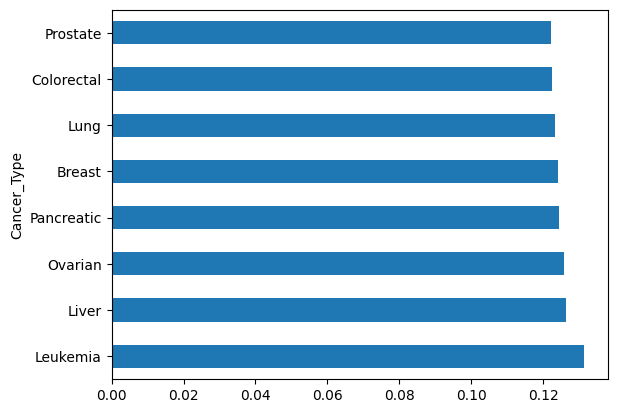

In [9]:
data['Cancer_Type'].value_counts(normalize=True).plot(kind='barh')
plt.show()

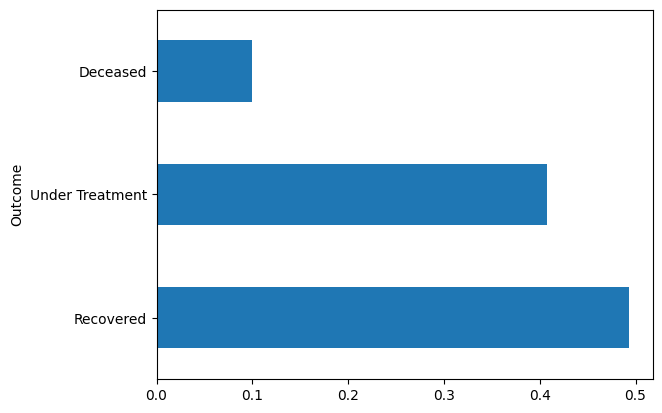

In [10]:
data['Outcome'].value_counts(normalize=True).plot(kind='barh')
plt.show()

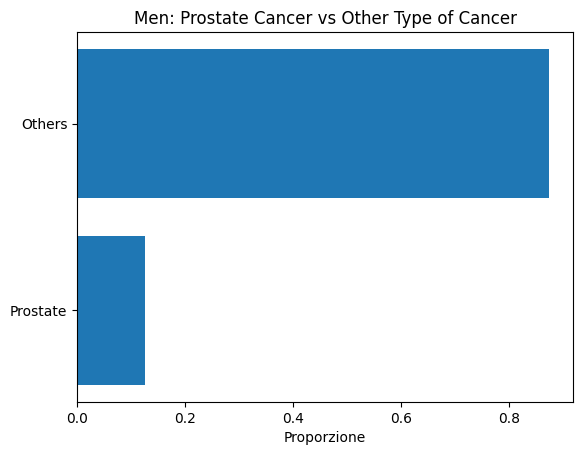

In [11]:
men = data[data["Gender"] == "Male"]

# 2. Calcola proporzioni negli uomini
counts = men["Cancer_Type"].value_counts(normalize=True)

# 3. Crea una categoria aggregata "Altri"
prostate = counts.get("Prostate", 0)
others = 1 - prostate

comparison = {
    "Prostate": prostate,
    "Others": others
}

# 4. Plot
plt.barh(list(comparison.keys()), list(comparison.values()))
plt.xlabel("Proporzione")
plt.title("Men: Prostate Cancer vs Other Type of Cancer")
plt.show()

Cancer_Type
Liver         0.131394
Breast        0.127984
Leukemia      0.127182
Pancreatic    0.125978
Colorectal    0.125978
Lung          0.121364
Ovarian       0.120160
Prostate      0.119960
Name: proportion, dtype: float64


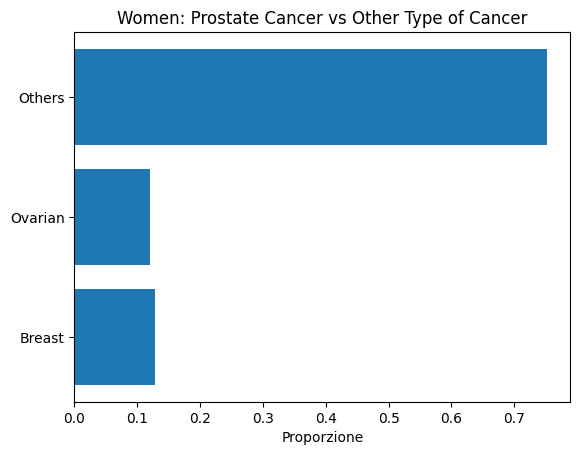

In [12]:
men = data[data["Gender"] == "Female"]

# 2. Calcola proporzioni negli uomini
counts = men["Cancer_Type"].value_counts(normalize=True)

# 3. Crea una categoria aggregata "Altri"
breast = counts.get("Breast", 0)
ovarian = counts.get("Ovarian", 0)
others = 1 - breast - ovarian
print(counts)
comparison = {
    "Breast": breast,
    "Ovarian": ovarian,
    "Others": others
}

# 4. Plot
plt.barh(list(comparison.keys()), list(comparison.values()))
plt.xlabel("Proporzione")
plt.title("Women: Prostate Cancer vs Other Type of Cancer")
plt.show()

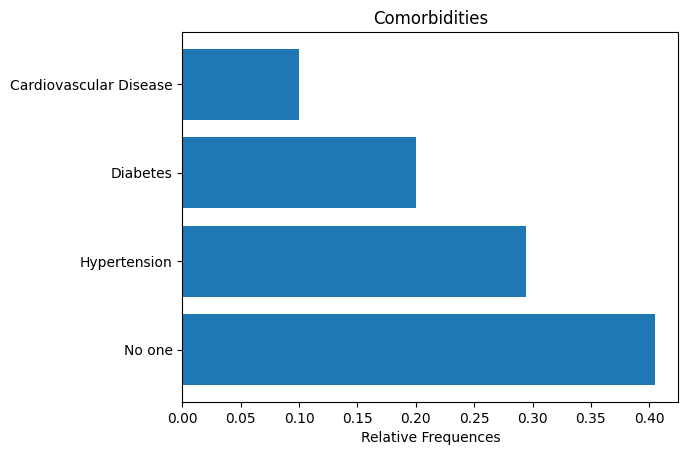

In [13]:
# 1. Sostituisci i NaN con "No one"
data["Comorbidities"] = data["Comorbidities"].fillna("No one")

# 2. Calcola frequenze relative
freq_rel = data["Comorbidities"].value_counts(normalize=True)

# 3. Plot barre orizzontali
plt.barh(freq_rel.index, freq_rel.values)
plt.xlabel("Relative Frequences")
plt.title("Comorbidities")
plt.show()

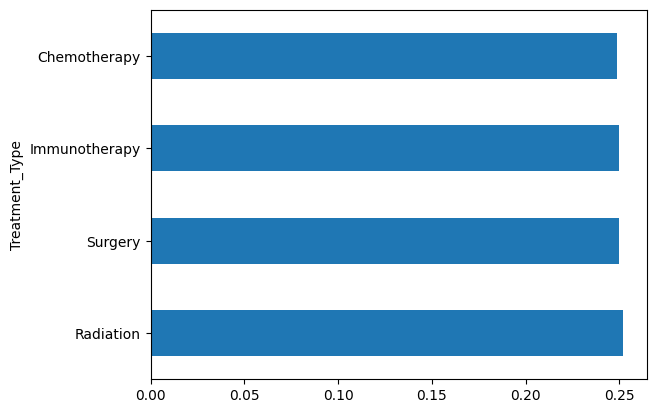

In [14]:
data['Treatment_Type'].value_counts(normalize=True).plot(kind='barh')
plt.show()

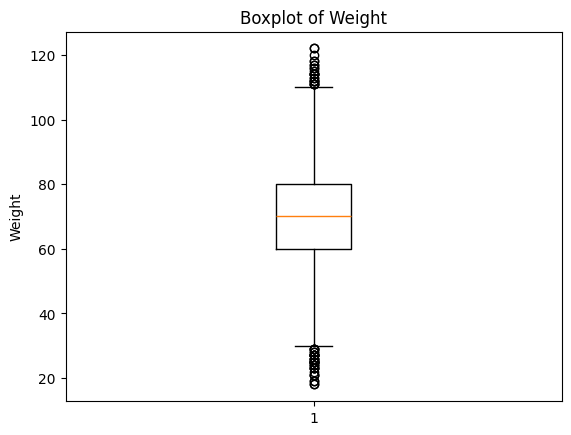

In [15]:
plt.boxplot(data['Weight'])
plt.title("Boxplot of Weight")
plt.ylabel("Weight")
plt.show()

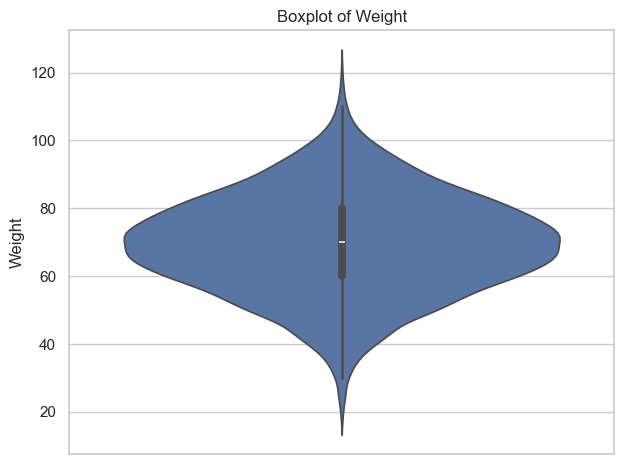

In [16]:
sns.set_theme(style="whitegrid")
sns.violinplot(data=data['Weight'])
plt.title("Boxplot of Weight")
plt.tight_layout()
plt.show()


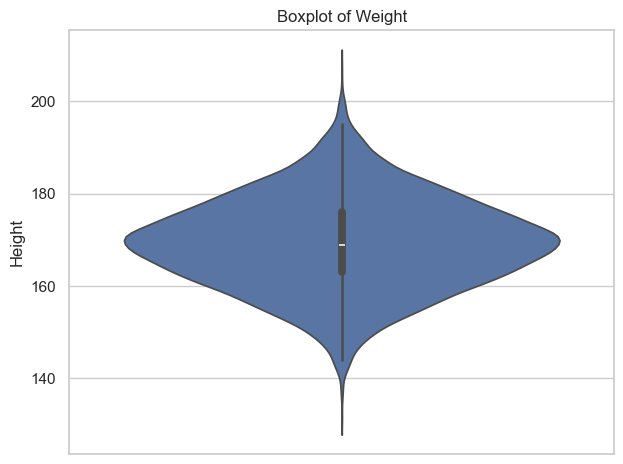

In [17]:
sns.set_theme(style="whitegrid")
sns.violinplot(data=data['Height'])
plt.title("Boxplot of Weight")
plt.tight_layout()
plt.show()

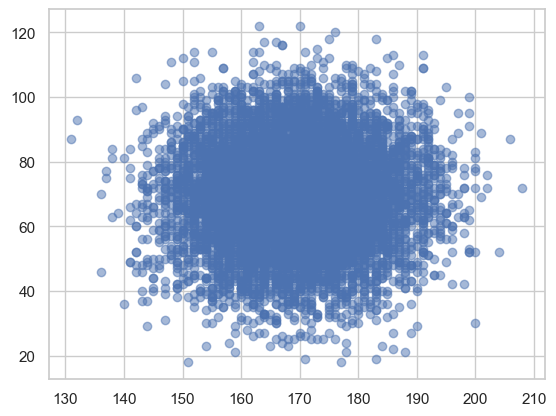

In [18]:
plt.scatter(data['Height'],data['Weight'], alpha=0.5)
plt.show()